In [1]:
%matplotlib inline 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
booking = pd.read_csv('hotel_bookings.csv')

In [3]:
booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Cleaning + EDA

In [4]:
booking.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
booking['arrival_date_year '] = pd.to_datetime(booking.arrival_date_year)
booking['reservation_status_date'] = pd.to_datetime(booking.reservation_status_date)

In [6]:
booking.shape

(119390, 33)

In [7]:
booking.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
booking.drop(['company'], axis = 1, inplace = True)

In [9]:
booking.drop(['agent'], axis = 1, inplace = True)

In [10]:
booking.dropna(subset = ['country'], axis = 0, inplace = True)

In [11]:
booking.dropna(subset=['children'], axis=0, inplace=True)

In [12]:
from sklearn.pipeline import make_pipeline, Pipeline 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn. compose import ColumnTransformer, make_column_transformer 

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold

In [15]:
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import plot_roc_curve

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_features = booking.drop('is_repeated_guest', axis = 1)
y_target = booking.is_repeated_guest

Text(0, 0.5, 'Общее число')

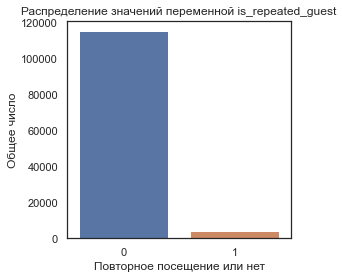

In [18]:
plt.figure(figsize = (4,4))
sns.set(style = 'white')
ax = sns.countplot(x = 'is_repeated_guest', data = booking)
plt.title('Распределение значений переменной is_repeated_guest')
plt.xlabel('Повторное посещение или нет')
plt.ylabel('Общее число')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, 
                                                    random_state=0, stratify=y_target)

In [20]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [21]:
def num_cat(df):
    
    num_int_type = df.select_dtypes(include='int64').columns.tolist()
    num_float_type = df.select_dtypes(include='float64').columns.tolist()
    num_type = num_int_type + num_float_type

    cat_object_type = df.select_dtypes(include='object').columns.tolist()
    
    return num_type, cat_object_type

num_type_tn, cat_obj_type_tn = num_cat(X_train)
num_type_tt, cat_obj_type_tt = num_cat(X_test)

In [22]:
def num_cat_transformer(num_type, cat_object_type):
    num_transformer = make_pipeline(StandardScaler(),
                                    SimpleImputer(strategy='constant'))
    cat_transformer = make_pipeline(SimpleImputer(strategy='constant'),
                                    OneHotEncoder(sparse=False, handle_unknown='ignore'))

    column_transformer = make_column_transformer((num_transformer, num_type),
                                                   (cat_transformer, cat_object_type))
    return column_transformer

In [23]:
column_transformer_tn = num_cat_transformer(num_type_tn, cat_obj_type_tn)
X_train = pd.DataFrame(column_transformer_tn.fit_transform(X_train))
display(X_train.head())

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,248
0,-0.769199,-0.973713,-0.222023,0.207379,0.365995,-0.929634,-0.788809,-1.516302,-0.080381,3.348049,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.769199,-0.908358,-1.635478,1.457494,0.593901,-0.929634,-0.788809,0.252711,-0.080381,-0.102917,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.769199,0.566786,1.191431,-1.263344,-0.773537,0.072053,0.263903,-1.516302,-0.080381,-0.102917,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.769199,-0.702958,-0.222023,0.280915,1.391574,-0.929634,-0.788809,0.252711,-0.080381,-0.102917,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.300054,0.342714,-0.222023,-0.380910,0.821808,0.072053,-0.262453,0.252711,-0.080381,-0.102917,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [24]:
X_test = pd.DataFrame(column_transformer_tn.transform(X_test))
display(X_test.head())

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,248
0,-0.769199,-0.628268,-1.635478,1.383958,-0.887490,1.073740,1.316615,-1.516302,-0.080381,-0.102917,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.769199,-0.777649,1.191431,-1.410417,0.707855,-0.929634,0.790259,0.252711,-0.080381,-0.102917,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.300054,0.071959,-0.222023,0.575060,0.707855,0.072053,0.790259,2.021724,-0.080381,-0.102917,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.769199,-0.889686,1.191431,-0.969200,-0.887490,1.073740,-0.788809,0.252711,-0.080381,-0.102917,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.769199,-0.096095,1.191431,-0.895663,-0.203771,0.072053,-0.262453,0.252711,-0.080381,-0.102917,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [25]:
from collections import Counter

In [26]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [27]:
def upsampling_data(X,y):
    sm = SMOTE(sampling_strategy = 'auto', random_state = 42)
    X_sm, y_sm = sm.fit_sample(X_train, y_train
                              )
    return X_sm, y_sm

In [28]:
def train_model(model, X, y, num_procs, metrics):
    split1 = StratifiedKFold(n_splites = 5, shuffle = True, random_state = 42)
    cv_score = cross_val_score(model, X,y,
                              cv = split1,
                              scoring = metrics,
                              n_jobs=-1).mean()
    return cv_score

In [29]:
def model_prediction(model, X_train, y_train, X_topredict, y_true):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_topredict)
    
    class_report = classification_report(y_test, y_pred)
    disp_roc = plot_roc_curve(model, X_topredict, y_true)
    conf_matrix = plot_confusion_matrix(model, X_topredict, y_true, cmap = 'Blues')
    return class_report, disp_roc, conf_matrix

In [30]:
X_train_sm, y_train_sm = upsampling_data(X_train, y_train)

In [31]:
Logit_1 = LogisticRegression(random_state = 42, n_jobs=-1).fit(X_train_sm, y_train_sm)

/Users/anastasia/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/anastasia/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


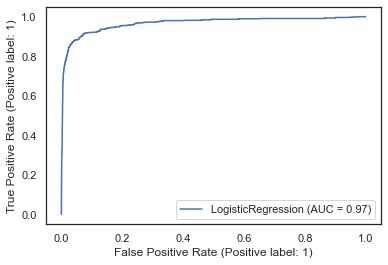

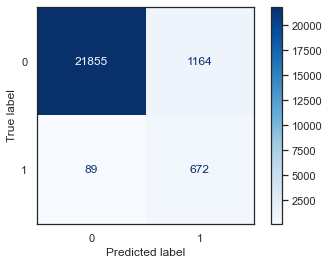

In [32]:
class_report, disp_roc, conf_matrix = model_prediction(Logit_1, X_train_sm, y_train_sm, X_test, y_test)

In [33]:
Logit_2 = LogisticRegression(random_state = 42, n_jobs=-1).fit(X_train, y_train)

/Users/anastasia/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/anastasia/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


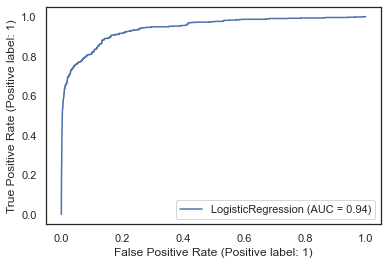

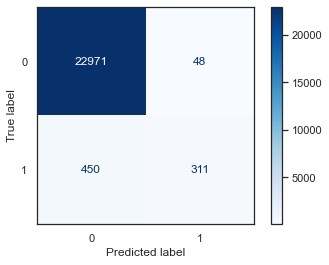

In [34]:
class_report, disp_roc, conf_matrix = model_prediction(Logit_2, X_train, y_train, X_test, y_test)